<a href="https://colab.research.google.com/github/yashsahu27420/python-projects-/blob/main/Sales_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sales Performance Analysis





## Sales Performance Analysis and Report Highlights

**Regional Performance:**

* Geographically diverse revenue contributions, with Sub-Saharan Africa (39.67M USD) and Europe (33.37M USD) leading.
* Asia and Australia/Oceania contribute significantly (>14M USD each).
* Central America and the Caribbean demonstrate strength (9.17M USD), showcasing a multifaceted revenue landscape.

**Sales by Category:**

* Cosmetics dominate total revenue (36.60M USD), followed closely by Household (29.89M USD) and Office Supplies (30.59M USD).
* Baby Food and Clothes show strong performance, while Fruits and Snacks have lower revenue.
* Diverse items like Cereal and Meat contribute to a dynamic product portfolio.

**Profitability Analysis:**

* Top 3 most profitable products: Cosmetics, Household, and Office Supplies.
* Products with moderate profitability: Baby Food, Clothes, Fruits, and Snacks.
* Cereal and Meat have lower profitability.

**Strategic Recommendations:**

* **Prioritize marketing and sales efforts:** Leverage data analysis to identify key customer segments and target regions for the most profitable products (Cosmetics, Household, and Office Supplies).
* **Increase profit margins:** Employ data-driven techniques like price optimization and cost analysis to maximize profitability for moderately profitable products (Baby Food, Clothes, Fruits, and Snacks).
* **Reassess product viability:** Analyze profitability trends and market data to determine the viability of low-profit products like Cereal and Meat.
* **Consider additional factors:** Integrate customer demand data and market trends analysis alongside profitability when making product decisions.

**Data analysis methodologies:**

* Descriptive statistics (mean, median, range)
* Geographic segmentation
* Category analysis
* Profitability analysis
* Customer segmentation
* Trend analysis




In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [142]:

data=pd.read_csv("https://raw.githubusercontent.com/yashsahu27420/dataset/main/Sales%20Performance%20Analysis%20data%20set.csv")

In [143]:
#Basic Overview:
data.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50,NaN,NaN
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36,NaN,NaN
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75,NaN,NaN
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82,NaN,NaN
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50,NaN,NaN


In [108]:
#Data Cleaning:
data.isnull().sum()

Region              0
Country             0
Item_Type           0
Sales_Channel       0
Order_Priority      0
Ship_Date           0
Unit_Cost           0
Total_Revenue       0
Total_Profit        0
Unnamed: 9        100
Unnamed: 10       100
dtype: int64

In [109]:
#Data Types:
data.dtypes

Region             object
Country            object
Item_Type          object
Sales_Channel      object
Order_Priority     object
Ship_Date          object
Unit_Cost         float64
Total_Revenue     float64
Total_Profit      float64
Unnamed: 9        float64
Unnamed: 10       float64
dtype: object

In [110]:
#Summary Statistics:
data.describe()

,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
count,100.000000,1.000000e+02,1.000000e+02,0.0,0.0
mean,191.048000,1.373488e+06,4.416820e+05,NaN,NaN
std,188.208181,1.460029e+06,4.385379e+05,NaN,NaN
min,6.920000,4.870260e+03,1.258020e+03,NaN,NaN
25%,35.840000,2.687212e+05,1.214436e+05,NaN,NaN
50%,107.275000,7.523144e+05,2.907680e+05,NaN,NaN
75%,263.330000,2.212045e+06,6.358288e+05,NaN,NaN
max,524.960000,5.997055e+06,1.719922e+06,NaN,NaN


In [111]:
#Sales Distribution by Region and Country :

#Group by Region:
sales_by_region = data.groupby('Region')['Total_Revenue'].sum().reset_index()
sales_by_country = data.groupby('Country')['Total_Revenue'].sum().reset_index()

In [112]:
#Sales Distribution by Region
print(sales_by_region.to_markdown(index=False))

| Region                            |   Total_Revenue |
|:----------------------------------|----------------:|
| Asia                              |     2.13471e+07 |
| Australia and Oceania             |     1.40943e+07 |
| Central America and the Caribbean |     9.17039e+06 |
| Europe                            |     3.33689e+07 |
| Middle East and North Africa      |     1.40527e+07 |
| North America                     |     5.64336e+06 |
| Sub_Saharan Africa                |     3.9672e+07  |


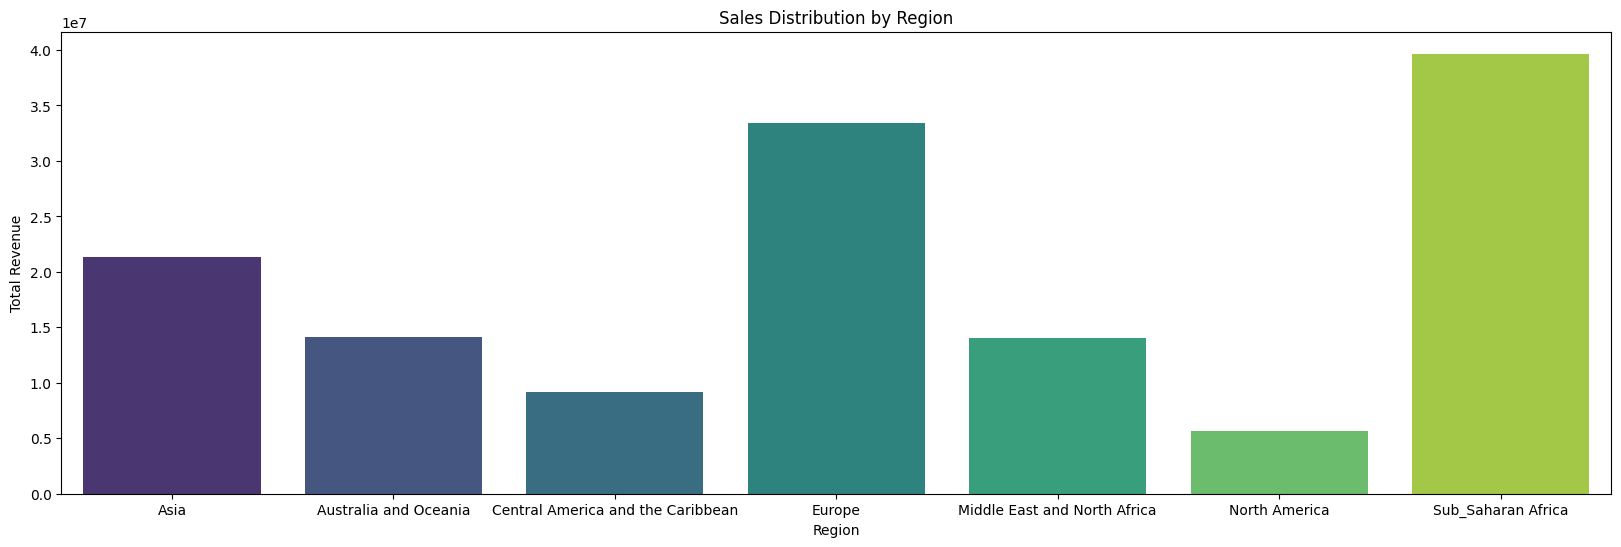

In [113]:
#Data visualization of Sales Distribution by Region
plt.figure(figsize=(20, 6))
sns.barplot(x='Region', y='Total_Revenue', data=sales_by_region, palette='viridis')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

In [118]:
#Sales Distribution by Country
print(sales_by_country.to_markdown())

|    | Country                          |    Total_Revenue |
|---:|:---------------------------------|-----------------:|
|  0 | Albania                          | 247956           |
|  1 | Angola                           |      2.79805e+06 |
|  2 | Australia                        |      2.48993e+06 |
|  3 | Austria                          |      1.24471e+06 |
|  4 | Azerbaijan                       |      4.4788e+06  |
|  5 | Bangladesh                       | 902981           |
|  6 | Belize                           | 600821           |
|  7 | Brunei                           |      4.36832e+06 |
|  8 | Bulgaria                         |      2.7792e+06  |
|  9 | Burkina Faso                     |      1.24511e+06 |
| 10 | Cameroon                         |      3.85103e+06 |
| 11 | Cape Verde                       | 455479           |
| 12 | Comoros                          | 197883           |
| 13 | Costa Rica                       | 523808           |
| 14 | Cote d'Ivoire    

In [119]:
#Data visualization of Sales Distribution by Country om Maps

fig = px.scatter_geo(
    data,
    locations='Country',
    locationmode='country names',
    color='Total_Revenue',
    size='Total_Revenue',
    hover_name='Country',
    title='Sales Distribution by Country with Flags',
    color_continuous_scale='viridis',
    projection='natural earth',
)

# Add flags to the plot
fig.update_geos(
    showcountries=True,
    countrycolor='rgb(0,0,0)',
    showframe=False,
    showcoastlines=False,
    showland=True,
    landcolor='rgb(217, 217, 217)',
    fitbounds='locations',
)

# Show the plot
fig.show()


In [124]:
#Sales Distribution by Item Type
sales_by_Item_Type   = data.groupby('Item_Type')['Total_Revenue'].sum().reset_index()

sales_by_Item_Type

,Item_Type,Total_Revenue
0,Baby Food,10350327.60
1,Beverages,2690794.60
2,Cereal,5322898.90
3,Clothes,7787292.80
4,Cosmetics,36601509.60
5,Fruits,466481.34
6,Household,29889712.29
7,Meat,4503675.75
8,Office Supplies,30585380.07
9,Personal Care,3980904.84


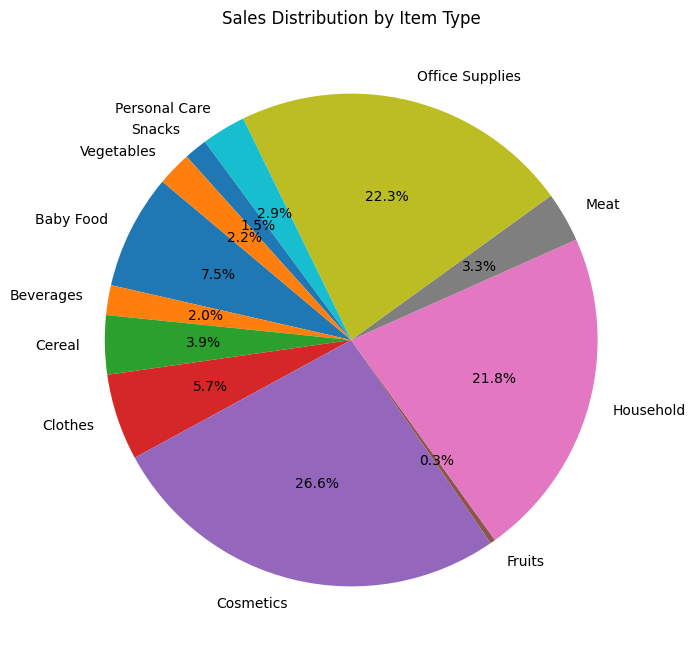

In [125]:
#Data visualization of Sales Distribution by Item Type

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sales_by_item_type, labels=sales_by_item_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Item Type')
plt.show()

In [130]:
sales_by_Sales_Channel = data.groupby('Sales_Channel')['Total_Revenue'].sum().reset_index()
sales_by_Sales_Channel

,Sales_Channel,Total_Revenue
0,Offline,79094809.20
1,Online,58253959.11


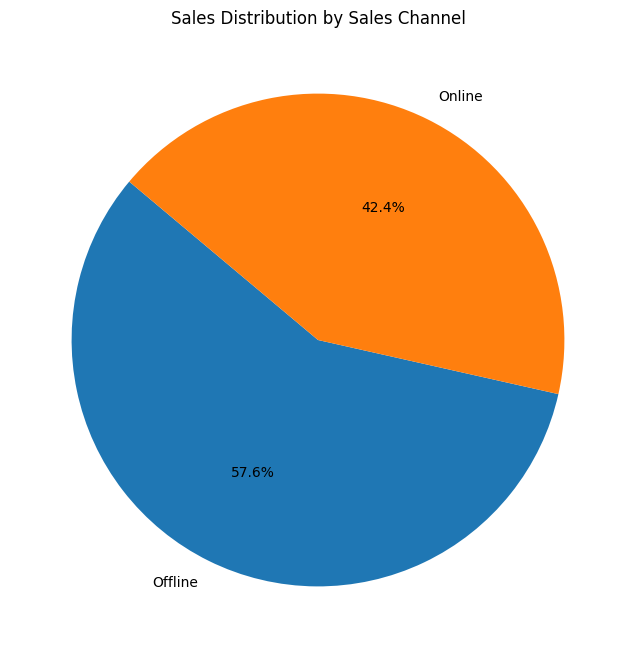

In [132]:
# Plotting a pie chart
sales_by_Sales_Channel_viz = data.groupby('Sales_Channel')['Total_Revenue'].sum()
plt.figure(figsize=(10, 8))
plt.pie(sales_by_Sales_Channel_viz, labels=sales_by_Sales_Channel_viz.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Sales Channel')
plt.show()

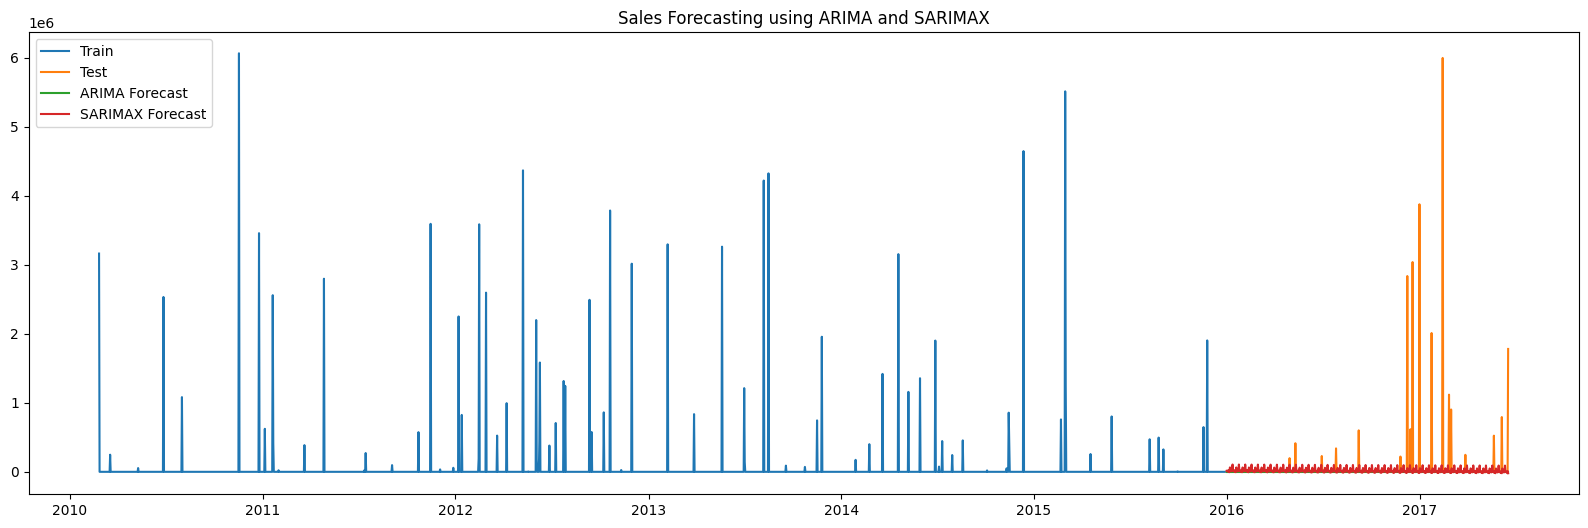

In [138]:
#Forecasting Future Sales:

data['Ship_Date'] = pd.to_datetime(data['Ship_Date'])

# Extract relevant columns
time_series_data = data[['Ship_Date', 'Total_Revenue']]

# Set 'Ship_Date' as the index
time_series_data.set_index('Ship_Date', inplace=True)

# Resample data to daily frequency (adjust as needed)
time_series_data = time_series_data.resample('D').sum()

# Train/test split (adjust the split point based on your data)
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# ARIMA model
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()

# SARIMAX model (consider adding exogenous variables)
sarimax_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()


# Forecast using ARIMA
arima_forecast = arima_fit.predict(start=len(train), end=len(train) + len(test)-1)

# Forecast using SARIMAX
sarimax_forecast = sarimax_fit.predict(start=len(train), end=len(train) + len(test)-1)

# Plotting the results
plt.figure(figsize=(20, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast')
plt.legend()
plt.title('Sales Forecasting using ARIMA and SARIMAX')
plt.show()


| Item_Type       |     Total_Profit |
|:----------------|-----------------:|
| Cosmetics       |      1.4556e+07  |
| Household       |      7.41261e+06 |
| Office Supplies |      5.92958e+06 |
| Clothes         |      5.23333e+06 |
| Baby Food       |      3.88664e+06 |
| Cereal          |      2.29244e+06 |
| Vegetables      |      1.26582e+06 |
| Personal Care   |      1.22062e+06 |
| Beverages       | 888047           |
| Snacks          | 751944           |
| Meat            | 610610           |
| Fruits          | 120495           |


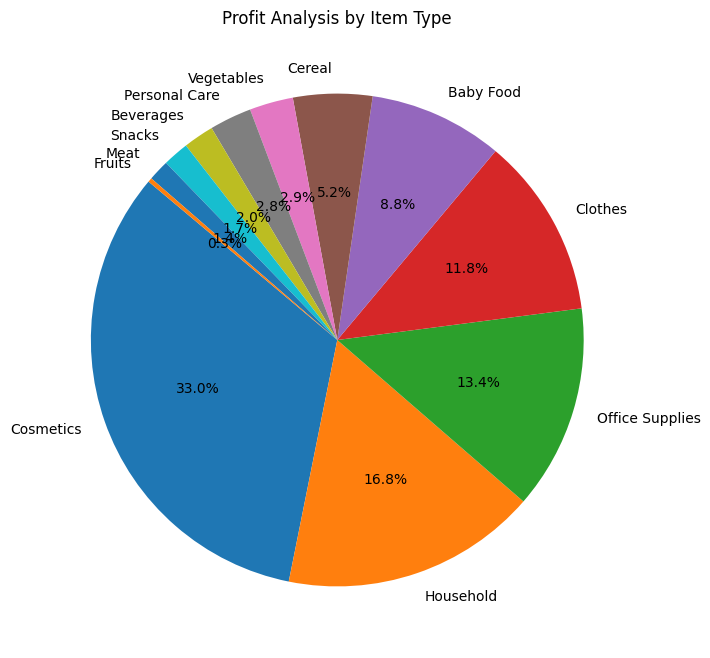

In [155]:
# Profit Analysis product wise   :

profit_by_item = data.groupby('Item_Type')['Total_Profit'].sum().sort_values(ascending=False)

print(profit_by_item.to_markdown() )

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(profit_by_item, labels=profit_by_item.index, autopct='%1.1f%%', startangle=140)
plt.title('product-wise profit analysis')
plt.show()
